# Hotel Booking Cancellation Prediction
In the hospitality industry, managing hotel bookings efficiently is crucial for maximizing revenue and providing top-notch customer service. One of the challenges hotels face is predicting whether a booking is likely to be canceled or not. Understanding the factors that contribute to booking cancellations can help hotels make informed decisions and allocate resources effectively.

In this project, we aim to explore the factors that contribute to booking cancellations in the hospitality industry. Our dataset contains information on bookings for both a Resort Hotel and a City Hotel, including various features such as lead time, arrival date, number of guests, room types, deposit types, and more.

## Content
1. Define the Problem
2. Gather the Data
3. Prepare Data for Consumption
4. Exploratory Data Analysis (EDA)
5. Model Data
6. Conclusion
7. References

## 1. Define the Problem
The main objectives are as follows:
### EDA
1. What is the distribution of hotel types (Resort Hotel or City Hotel) in the dataset?
2. How does the lead time (number of days between booking and arrival) vary across hotel types?
3. Which month has the highest number of bookings?
4. What is the average daily rate (ADR) for different room types?
5. Is there a relationship between the number of previous cancellations and the likelihood of cancellation?

### ML
- <b>Predicting Booking Cancellations</b>: build a machine learning model that can predict whether a person will cancel their booking based on the available features in the dataset. This model can be valuable for hotels to anticipate cancellations and plan resources effectively. It can also help in offering more rooms than available to maximize revenue, as mentioned in the project description.

## 2. Gather the Data
We will use the [Hotel booking demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand) dataset which contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

## 3. Prepare Data for Consumption

### 3.1 Import Libraries

In [97]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.inspection import permutation_importance
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.base import BaseEstimator
from joblib import dump, load
import shap

from typing import Tuple
from calendar import month_name

sns.set_theme()

### 3.2 Meet and Greet Data
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

<b>Target variable</b>
- `is_canceled`: value indicating if booking was canceled.

<b>Feature variables</b>

| Feature   |                                                                                                                                                                                                       Description                                                                                                                                                                                                        |
|----------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|1. `hotel`|                                                                                                                                                                                                Resort Hotel or City Hotel                                                                                                                                                                                                |
|2. `lead_time`|                                                                                                                                                          Number of days that elapsed between the entering date of the booking into the PMS and the arrival date                                                                                                                                                          |
|3. `arrival_date_year`|                                                                                                                                                                                                   Year of arrival date                                                                                                                                                                                                   |
|4. `arrival_date_month`|                                                                                                                                                                                                  Month of arrival date                                                                                                                                                                                                   |
|5. `arrival_date_week_number`|                                                                                                                                                                                           Week number of year for arrival date                                                                                                                                                                                           |
|6. `arrival_date_day_of_month`|                                                                                                                                                                                                   Day of arrival date                                                                                                                                                                                                    |
|7. `stays_in_weekend_nights`|                                                                                                                                                              Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel                                                                                                                                                               |
|8. `stays_in_week_nights`|                                                                                                                                                                 Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel                                                                                                                                                                 |
|9. `adults`|                                                                                                                                                                                                     Number of adults                                                                                                                                                                                                     |
|10. `children`|                                                                                                                                                                                                    Number of children                                                                                                                                                                                                    |
|11. `babies`|                                                                                                                                                                                                     Number of babies                                                                                                                                                                                                     |
|12. `meal`|                                                                                Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)                                                                                 |
|13. `country`|                                                                                                                                                                       Country of origin. Categories are represented in the ISO 3155–3:2013 format                                                                                                                                                                        |
|14. `market_segment`|                                                                                                                                                      Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”                                                                                                                                                      |
|15. `distribution_channel`|                                                                                                                                                            Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”                                                                                                                                                             |
|16. `is_repeated_guest`|                                                                                                                                                                      Value indicating if the booking name was from a repeated guest (1) or not (0)                                                                                                                                                                       |
|17. `previous_cancellations`|                                                                                                                                                               Number of previous bookings that were cancelled by the customer prior to the current booking                                                                                                                                                               |
|18. `previous_bookings_not_canceled`|                                                                                                                                                                  Number of previous bookings not cancelled by the customer prior to the current booking                                                                                                                                                                  |
|19. `reserved_room_type`|                                                                                                                                                               Code of room type reserved. Code is presented instead of designation for anonymity reasons.                                                                                                                                                                |
|20. `assigned_room_type`|                                                                            	Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.                                                                            |
|21. `booking_changes`|                                                                                                                                     Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation                                                                                                                                     |
|22. `deposit_type`|                                                           Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.                                                            |
|23. `agent`|                                                                                                                                                                                      ID of the travel agency that made the booking                                                                                                                                                                                       |
|24. `company`|                                                                                                                                    ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons                                                                                                                                    |
|25. `days_in_waiting_list`|                                                                                                                                                                Number of days the booking was in the waiting list before it was confirmed to the customer                                                                                                                                                                |
|26. `customer_type`| 	Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking |
|27. `adr`|                                                                                                                                                   Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights                                                                                                                                                    |
|28. `required_car_parking_spaces`|                                                                                                                                                                                  Number of car parking spaces required by the customer                                                                                                                                                                                   |
|29. `total_of_special_requests`|                                                                                                                                                                      Number of special requests made by the customer (e.g. twin bed or high floor)                                                                                                                                                                       |
|30. `reservation_status`|                                                                                  Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did not inform the hotel of the reason why                                                                                   |
|31. `reservation_status_date`|                                                                                                         Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel                                                                                                         |


In [2]:
# show 5 rows
booking_df = pd.read_csv('hotel_bookings.csv')
booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
booking_df[booking_df['is_canceled'] == 1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,No Deposit,9.0,NaN,0,Transient,0.0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2017-07-17


In [4]:
# show dataset structure
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# show statistical summary
booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### 3.3 Clean Data

### 3.3.1 Missing Values
We check the percentage of missing values per column and observe the following:
- 94% of company is missing (not going to be useful with so many values missing; can be safely dropped)
- 13% of agent is missing (can be filled with most occurring value)
- .4% of country is missing (can be filled with most occurring value)
- .0034% of children is missing (can be filled with 0)

In [6]:
# show missing percentage
(booking_df.isna().sum() / len(booking_df)).sort_values(ascending=False)

company                           0.943069
agent                             0.136862
country                           0.004087
children                          0.000034
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
hotel                             0.000000
previous_cancellations            0.000000
days_in_waiting_list              0.000000
customer_type                     0.000000
adr                               0.000000
required_car_parking_spaces       0.000000
total_of_special_requests         0.000000
reservation_status                0.000000
previous_bookings_not_canceled    0.000000
is_repeated_guest                 0.000000
is_canceled                       0.000000
distribution_channel              0.000000
market_segment                    0.000000
meal                              0.000000
babies                            0.000000
adults     

`Company`: This refers to the id of a company or entity that made the booking. With 94% of values missing, this won't be that much useful. We can safely drop this column.

`Agent`: This refers to the id of the travel agency that made the booking. We observe that majority of the values comes from travel agency '<b>9</b>'. We can replace the missing values with this.

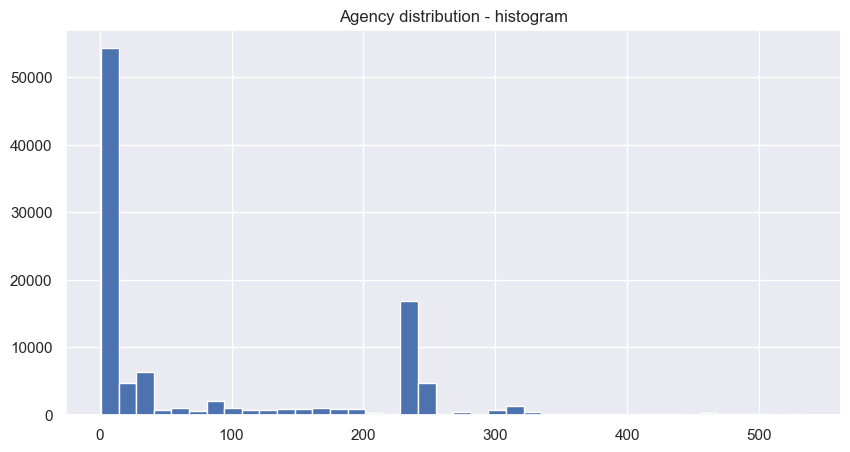

In [7]:
# plot agent
booking_df['agent'].hist(bins=40, figsize=(10,5))
plt.title('Agency distribution - histogram')
plt.show()

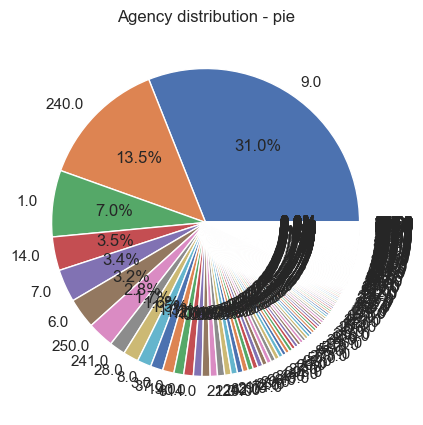

In [8]:
booking_df.groupby('agent').size().sort_values(ascending=False).plot.pie(autopct='%1.1f%%', figsize=(10,5))
plt.title('Agency distribution - pie')
plt.show()

`Country`: This refers to the customer's country of origin. Seeing that the majority of customers are from <b>Portugal (PRT)</b>, we can fill the missing values with this.

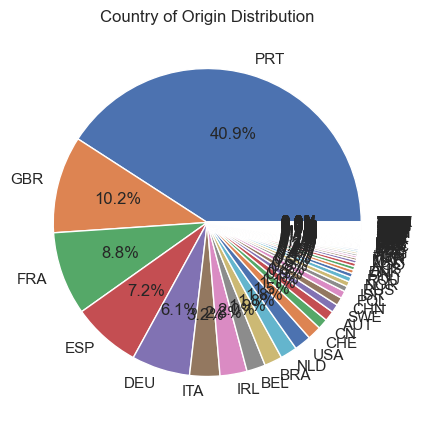

In [9]:
# plot country distribution
booking_df.groupby('country').size().sort_values(ascending=False).plot.pie(autopct='%1.1f%%', figsize=(10,5))
plt.title('Country of Origin Distribution')
plt.show()

`Children`: This refers to the number of children accompanying the person who made a reservation. Depending on the payment policy in hotels, the pricing for children can be free, discounted, or same price as an adult. However, it is more common to assume that there is still a payment involved which is why when this information is missing we can infer that the person had no children. We can fill this with 0.

In [10]:
# drop company
booking_df.drop(columns=['company'], inplace=True)
# fill agent with most occuering value
agent_mode = np.squeeze(booking_df['agent'].mode()) # travel agency id '9'
booking_df['agent'].fillna(agent_mode, inplace=True)
# fill country with most occurring value
country_mode = np.squeeze(booking_df['country'].mode()) # portugal or 'PRT'
booking_df['country'].fillna(country_mode, inplace=True)
# fill children with 0
booking_df['children'].fillna(0, inplace=True)


# show missing percentage
(booking_df.isna().sum() / len(booking_df)).sort_values(ascending=False)

hotel                             0.0
is_repeated_guest                 0.0
reservation_status                0.0
total_of_special_requests         0.0
required_car_parking_spaces       0.0
adr                               0.0
customer_type                     0.0
days_in_waiting_list              0.0
agent                             0.0
deposit_type                      0.0
booking_changes                   0.0
assigned_room_type                0.0
reserved_room_type                0.0
previous_bookings_not_canceled    0.0
previous_cancellations            0.0
distribution_channel              0.0
is_canceled                       0.0
market_segment                    0.0
country                           0.0
meal                              0.0
babies                            0.0
children                          0.0
adults                            0.0
stays_in_week_nights              0.0
stays_in_weekend_nights           0.0
arrival_date_day_of_month         0.0
arrival_date

### 3.3.2 Duplicate rows
We check the number of duplicate rows and observe the following:
- There are 32021 duplicate rows which is 26.82% of the dataset.

In [11]:
num_duplicate_rows = len(booking_df[booking_df.duplicated()]) # number of duplicate rows
print(f"There are {num_duplicate_rows} duplicate rows which is {(num_duplicate_rows/len(booking_df))*100 :.2f}% of the dataset.")

There are 32021 duplicate rows which is 26.82% of the dataset.


In [12]:
booking_df.drop_duplicates(inplace=True)

### 3.3.3 Incorrect data
We correct or remove data that do not make sense.

`adr`: This refers to the <b>Average Daily Rate</b> as defined by dividing the sum of all lodging transactions by the total number of staying nights.
- There should be no negative value for adr.
- As for 0 adr, this would mean that the guests were not charged. These might be for cases where the guests used a free hotel ticket (ya know, like in anime where the protagonists spin a lottery machine and they conveniently win a free trip to a hot spring just so we could have a hot spring episode).

In [13]:
negative_adr_index = booking_df[booking_df['adr'] < 0 ].index
print(f"There is/are {len(negative_adr_index)} rows with negative average daily rate.")

There is/are 1 rows with negative average daily rate.


In [14]:
booking_df.drop(index=negative_adr_index, inplace=True)

`deposit_type`: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay. The labeling is misleading as this does not necessarily correspond to if a booking is 'refundable' or not, rather it corresponds to if an amount was deposited (according to the description).

In [15]:
deposit_interpretation = {
    'No Deposit':'no amount',
    'Refundable':'some amount',
    'Non Refund':'full amount'
}
booking_df.replace(deposit_interpretation, inplace=True)

`reservation_status`: This refers to if the guest canceled, checked out, or did not show.
`reservation_status_date`: This refers to the date of the last status change. This means that this date changes depending on when a person cancels, or does check-out.
- When a booking is cancelled, this date will be <b>before</b> the expected arrival date.
- When a booking is not-cancelled (person completes his stay and checks out), this date will be <b>after</b> the arrival date.

See the problem? This is not an information we have beforehand when trying to predict if a guest will cancel his booking, but it can be mistakenly used as an indicator for canceling bookings. If we were to include this, the model we use might find this pattern and use it which would then make a false high prediction rate.

In [16]:
# get columns pertaining to arrival date
arrival_date_cols = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']
# merge and arrival dates
date_booking_df = booking_df[arrival_date_cols + ['reservation_status_date', 'is_canceled']].copy()
date_booking_df['arrival_date'] = booking_df['arrival_date_year'].astype(str)+'-'+\
                                  booking_df['arrival_date_month'].str[:3]+'-'+\
                                  booking_df['arrival_date_day_of_month'].astype(str)
# drop separated arrival date columns
date_booking_df.drop(columns=arrival_date_cols, inplace=True)
# convert to datetime
date_booking_df['arrival_date'] = pd.to_datetime(date_booking_df['arrival_date'])
date_booking_df['reservation_status_date'] = pd.to_datetime(date_booking_df['reservation_status_date'])


# cancelled, reservation_status_date is before the arrival_date.
before_arrival_date =  date_booking_df[date_booking_df['reservation_status_date'] < date_booking_df['arrival_date']].groupby('is_canceled').size()
# checked out (not cancelled) , reservation_status_date is after the arrival_date.
after_arrival_date = date_booking_df[date_booking_df['reservation_status_date'] > date_booking_df['arrival_date']].groupby('is_canceled').size()
# cancelled/ checked out at the same day
same_as_arrival_date = date_booking_df[date_booking_df['reservation_status_date'] == date_booking_df['arrival_date']].groupby('is_canceled').size()

In [17]:
print('When reservation status last update is earlier than booked arrival date, this means that the guest canceled his booking')
before_arrival_date

When reservation status last update is earlier than booked arrival date, this means that the guest canceled his booking


is_canceled
1    22249
dtype: int64

In [18]:
print('When reservation status last update is later than booked arrival date, this means that the guest checked out (not canceled)')
after_arrival_date

When reservation status last update is later than booked arrival date, this means that the guest checked out (not canceled)


is_canceled
0    62699
dtype: int64

In [19]:
print('When reservation status last update is on the same day as booked arrival date, this means that the guest cancelled/checked out on the same day of booking')
same_as_arrival_date

When reservation status last update is on the same day as booked arrival date, this means that the guest cancelled/checked out on the same day of booking


is_canceled
0     645
1    1775
dtype: int64

In [20]:
# we therefore drop this column
booking_df.drop(columns=['reservation_status', 'reservation_status_date'], inplace=True)

## 4. Exploratory Data Analysis (EDA)

### 4.1 Answering the questions

#### 4.1.1 What is the distribution of hotel types (Resort Hotel or City Hotel) in the dataset?

We observe the following:
- 61.15% bookings are from city hotels while 38.85% are from resort hotels.
- For city hotels, approximately 30% were canceled.
- For resort hotels, approximately 23% were canceled.


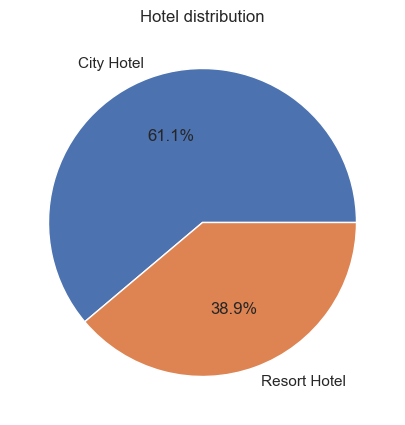

In [21]:
hotel_distribution = booking_df.groupby('hotel').size()
# plot hotel distribution
booking_df.groupby('hotel').size().plot.pie(autopct='%1.1f%%', figsize=(10,5))
plt.title('Hotel distribution')
plt.show()

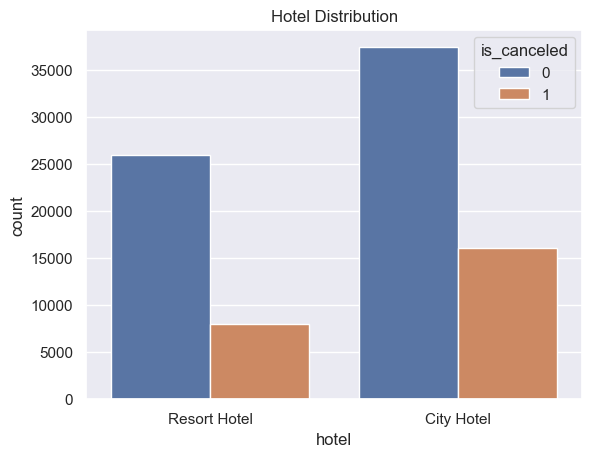

The following are the proportion of cancelled bookings per hotel:


hotel
City Hotel      0.300402
Resort Hotel    0.234953
Name: 1, dtype: float64

In [22]:
# plot hotel count distribution and if it was canceled
sns.countplot(data=booking_df, x='hotel', hue='is_canceled')
plt.title('Hotel Distribution')
plt.show()

# get proportion of cancelled bookings for each hotel type
hotel_cancelled_bookings = booking_df.groupby(['hotel', 'is_canceled']).size().unstack()
hotel_cancelled_bookings['total'] = hotel_cancelled_bookings[0] + hotel_cancelled_bookings[1] # get total
hotel_cancelled_bookings[0] = hotel_cancelled_bookings[0] / hotel_cancelled_bookings['total'] # get non-cancelled proportion
hotel_cancelled_bookings[1] = hotel_cancelled_bookings[1] / hotel_cancelled_bookings['total'] # get cancelled proportion

print("The following are the proportion of cancelled bookings per hotel:")
hotel_cancelled_bookings[1]

#### 4.1.2. How does the lead time (number of days between booking and arrival) vary across hotel types?
We observe the following:
- When there is a <b>large</b> lead time (80 days or more) for bookings, it is <u>more likely to be canceled</u>.
- When there is a <b>small</b> lead time (38 days or less) for bookings, it is <u>less likely to be canceled</u>.
- This applies for both resort and city hotels.

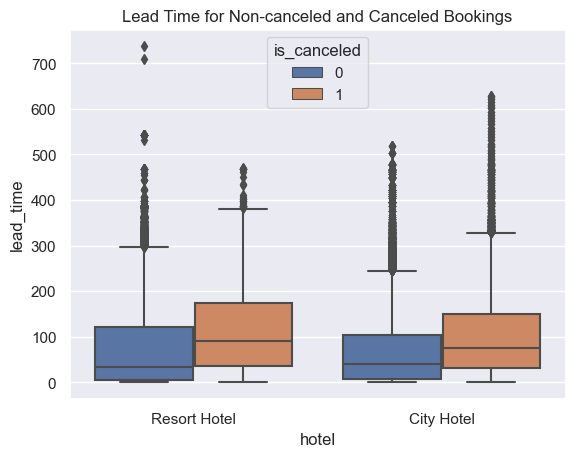

In [23]:
# plot lead time and for non-canceled and canceled bookings
sns.boxplot(data=booking_df, x='hotel', y='lead_time', hue='is_canceled')
plt.title('Lead Time for Non-canceled and Canceled Bookings')
plt.show()

In [24]:
print('Lead time average and median for non-canceled and canceled bookings')
booking_df.groupby('is_canceled').agg({'lead_time':[np.mean, np.median]})

Lead time average and median for non-canceled and canceled bookings


lead_time       
                   mean median
is_canceled                   
0             70.122995   38.0
1            105.720030   80.0

In [25]:
print('Resort Hotel - Lead time average and median for non-canceled and canceled bookings')
booking_df[booking_df['hotel'] == 'Resort Hotel'].groupby('is_canceled').agg({'lead_time':[np.mean, np.median]})

Resort Hotel - Lead time average and median for non-canceled and canceled bookings


lead_time       
                   mean median
is_canceled                   
0             74.053181   34.0
1            113.919248   91.0

In [26]:
print('City Hotel - Lead time average and median for non-canceled and canceled bookings')
booking_df[booking_df['hotel'] == 'City Hotel'].groupby('is_canceled').agg({'lead_time':[np.mean, np.median]})

City Hotel - Lead time average and median for non-canceled and canceled bookings


lead_time       
                   mean median
is_canceled                   
0             67.392391   40.0
1            101.645710   75.0

#### 4.1.3. Which month has the highest number of bookings?
- Analyze the distribution of bookings across different months of the year.
- Identify the month with the highest frequency of bookings.

We observe the following:
- Number of bookings are <u>highest in summer</u> (July, August).
- Number of bookings are <u>lowest in winter</u> (December, January).
- This applies for both resort and city hotels.

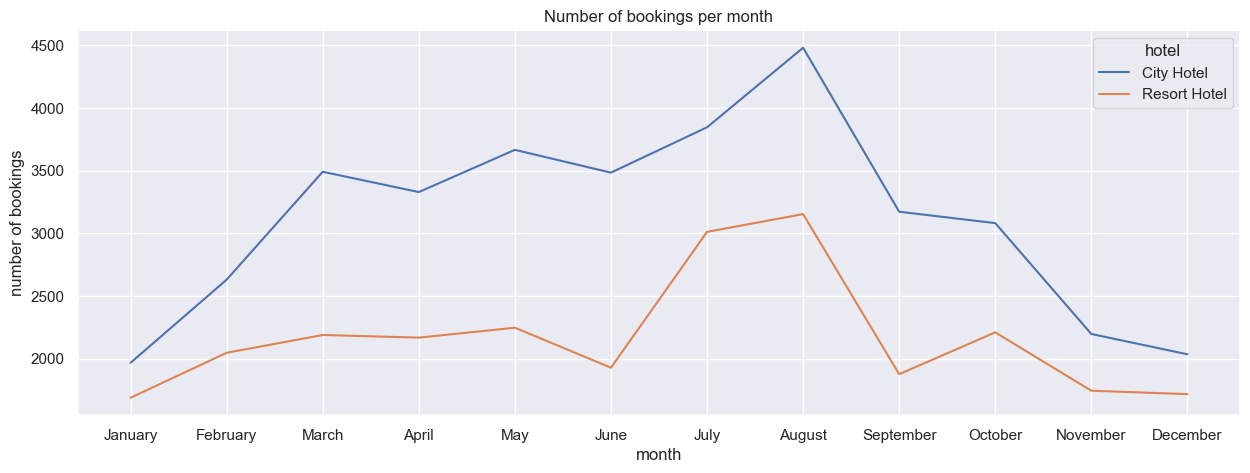

In [27]:
# get list of months
month_order = list(month_name)
# get only bookings that were not canceled
monthly_bookings = booking_df[booking_df['is_canceled'] == 0].groupby(['arrival_date_month', 'hotel']).size()
monthly_bookings = monthly_bookings.reset_index()
monthly_bookings = monthly_bookings.rename(columns={
    'arrival_date_month':'month',
    0:'number of bookings'
})
monthly_bookings['month'] = pd.Categorical(monthly_bookings['month'], categories=month_order, ordered=True)

# plot monthly bookings
plt.figure(figsize=(15,5))
sns.lineplot(data=monthly_bookings, x='month', y='number of bookings', hue='hotel', size_order='month_order')
plt.title('Number of bookings per month')
plt.show()

#### 4.1.4. What is the average daily rate (ADR) for different room types?
- Calculate the average ADR for each reserved room type.
- Determine if there are significant differences in ADR among different room types.

We observe the following:
- City hotels rooms have a <u>higher average daily rate</u> in room types <b>C,A,D,G,E</b>.
- Resort hotel rooms have a <u>higher average daily rate</u> in room types <b>F, B</b>.
- City hotels do not have room types H, L.

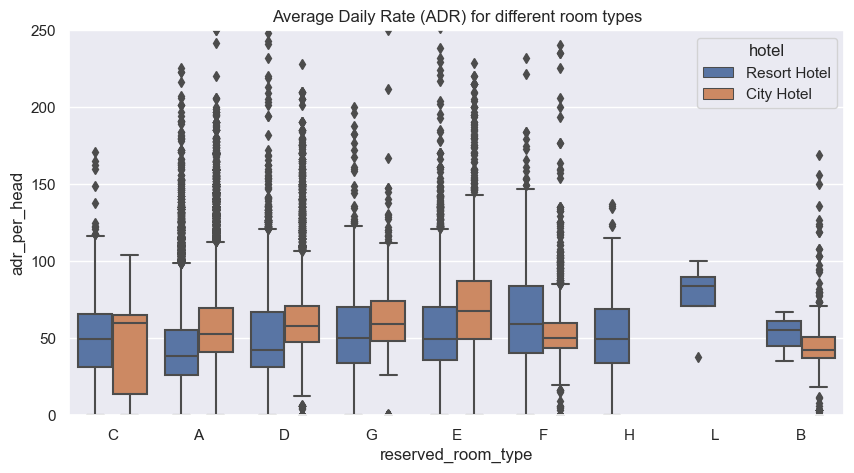

In [28]:
# get adr per head; I will assume adults and children are charged the same amount, while babies are not charged.
booking_df['adr_per_head'] = booking_df['adr'] / (booking_df['adults'] + booking_df['children'])

# plot adr for different room types
# fig, axes = plt.subplots(1, 2)
plt.figure(figsize=(10,5))
sns.boxplot(data=booking_df[booking_df['is_canceled'] == 0], x='reserved_room_type', y='adr_per_head', hue='hotel')
plt.title('Average Daily Rate (ADR) for different room types')
plt.ylim(0,250)
plt.show()

#### 4.1.5. Is there a relationship between the number of previous cancellations and the likelihood of cancellation?
We can observe the following:
- It is hard to say. Majority of the guests had no previous canceled bookings (some had only 1).
- For those that did have previous cancellations, we saw that <b>67.9%</b> canceled.

In [29]:
# show most common number of previous cancellations
booking_df.groupby('previous_cancellations').size().sort_values(ascending=False)

previous_cancellations
0     85683
1      1407
2       112
3        61
4        30
11       27
5        19
6        17
13        4
24        2
25        2
14        1
19        1
21        1
26        1
dtype: int64

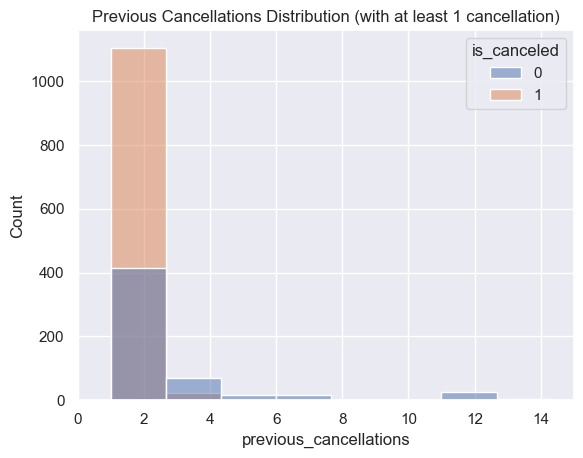

In [30]:
# plot previous cancellations distribution
with_previous_cancelation = booking_df[booking_df['previous_cancellations'] > 0]
sns.histplot(data=with_previous_cancelation, x='previous_cancellations', hue='is_canceled', bins=15)
plt.title('Previous Cancellations Distribution (with at least 1 cancellation)')
plt.xlim(0,15)
plt.show()

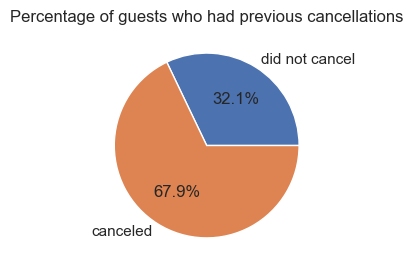

In [31]:
# plot percentage of guests who had previous cancellations and if they canceled their current reservation
plt.title('Percentage of guests who had previous cancellations')
with_previous_cancelation.groupby('is_canceled').size().plot.pie(autopct='%1.1f%%', labels=['did not cancel', 'canceled',],figsize=(3,3))
plt.show()

## 5. Model Data

### 5.1 Data Preparation

#### 5.1.1 Filter columns

In [32]:
# drop unneeded columns
garbage_cols = ['arrival_date_year',    # not going to be relevant in the coming years
                'adr_per_head',         # created only for visualization (we already have adr)
                'country',              # imbalanced, does not have enough guests from other countries
                'booking_changes',      # introduces data leak
                'days_in_waiting_list'] # introduces data leak
                # others which were removed earlier include [reservation_status, reservation_status_date]

booking_df.drop(columns=garbage_cols, inplace=True)

#### 5.1.2 Scale Numerical Features
<b>RobustScaler</b>- scales the features based on the median and interquartile range, making it robust to outliers (formula: (feature - median) / IQR). This will be used to scale the numeric features.

In [33]:
# get target column
target_col = booking_df[['is_canceled']]
# get all numeric and categorical data
numeric_cols = booking_df.select_dtypes(include='number').drop(columns=target_col)
categorical_cols = booking_df.select_dtypes(exclude='number')

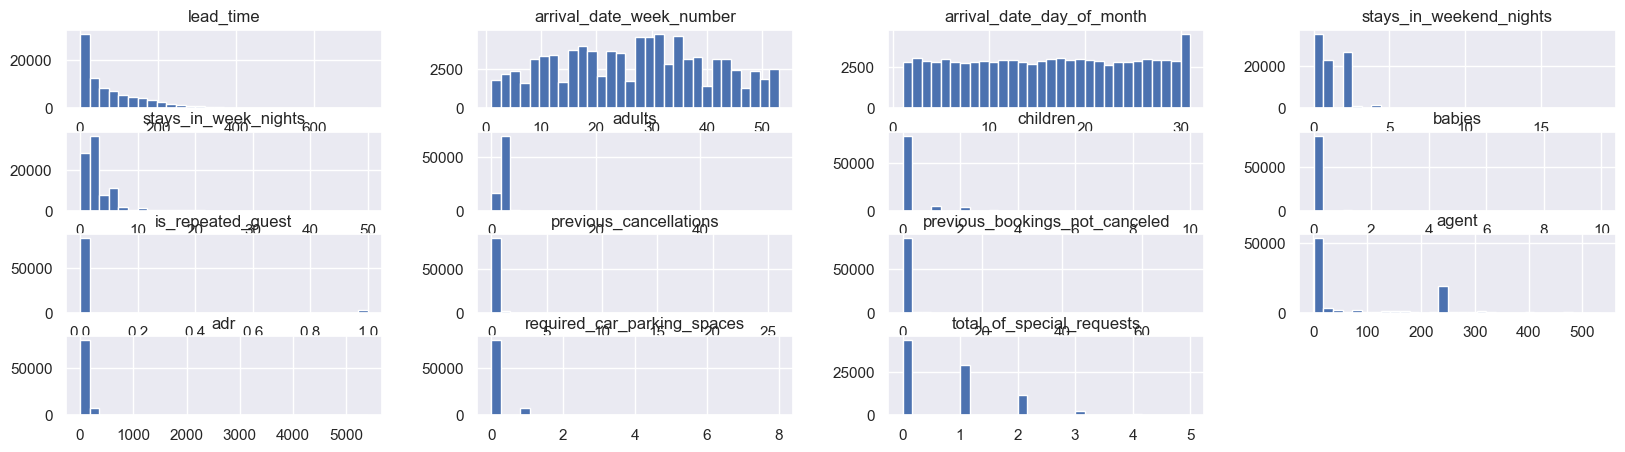

In [34]:
# plot distribution of numeric features
numeric_cols.hist(bins=30, figsize=(20,5))
plt.show()

In [35]:
# show statistical summary of numeric features
numeric_cols.describe()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
count,87368.000000,87368.000000,87368.000000,87368.000000,87368.000000,87368.00000,87368.000000,87368.000000,87368.000000,87368.000000,87368.000000,87368.000000,87368.000000,87368.000000,87368.000000
mean,79.911283,26.839850,15.815470,1.005414,2.625755,1.87595,0.138678,0.010828,0.039076,0.030423,0.184026,82.264101,106.348104,0.084253,0.698631
std,86.056150,13.673193,8.834866,1.031936,2.053683,0.62648,0.455938,0.113615,0.193777,0.369204,1.732157,109.056995,55.003555,0.281574,0.831941
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11.000000,16.000000,8.000000,0.000000,1.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,72.000000,0.000000,0.000000
50%,49.000000,27.000000,16.000000,1.000000,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,98.100000,0.000000,0.000000
75%,125.000000,37.000000,23.000000,2.000000,4.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,134.000000,0.000000,1.000000
max,737.000000,53.000000,31.000000,19.000000,50.000000,55.00000,10.000000,10.000000,1.000000,26.000000,72.000000,535.000000,5400.000000,8.000000,5.000000


In [36]:
# scale numeric features
scaler = RobustScaler()
numeric_cols_names = numeric_cols.columns
numeric_cols_index = numeric_cols.index
scaled_numeric_cols = scaler.fit_transform(numeric_cols)

numeric_cols = pd.DataFrame(data=scaled_numeric_cols, index=numeric_cols_index, columns=numeric_cols_names)

#### 5.1.3 One-Hot Encode Categorical Features
Perform one-hot encoding to categorical features.

In [37]:
# perform onehot encoding on categorical variables
oh_categorical_cols = pd.get_dummies(categorical_cols, columns=categorical_cols.columns, drop_first=True)
# merge columns
booking_df = pd.concat([target_col, numeric_cols, oh_categorical_cols], axis=1)

#### 5.1.4 Correlation
<b>Correlation matrices</b>- help us understand which features heavily affect whether a transaction is a fraud or genuine. Its value ranges from 0-1 wherein values closer to 0 means<i>stronger negative correlation</i> while values closer to 1 means <i>stronger positive correlation</i>.

We observe the following:
- Positive correlation- features `market_segment_Online TA`, `lead_time`,`distribution_channel_TA/TO`, `adr`, `customer_type_Transient`, have the highest positive correlation to target `is_canceled`. A higher value for these features indicate a more likely chance for cancellation.
- Negative correlation- features `required_car_parking_spaces`, `deposit_type_no amount`, `market_segment_Offline TA/TO`, `total_of_special_requests`,`distribution_channel_Direct`. A lower value for these features indicate a more likely changce for cancellation.

It is important to note that while these have the highest values, they are still quite low which indicate a weak correlation. There might be a nonlinear relationship which <i>Pearson correlation</i> is not able to capture since it only measures the strength and direction of a linear relationship between two continuous variables.. I am quite excited to test out <i>Explainable AI (XAI)</i> techniques wherein we find out which features our trained ML model thinks is most important. We would then see if it's the same as the features we suspect (highest correlation values).

In [38]:
booking_corr = booking_df.corr()['is_canceled']
# get top 5 features with the highest positive correlation to target label
print("Top 5 features with the highest positive correlation to target label")
print(booking_corr.sort_values(ascending=False).iloc[1:6])
# get top 5 features with the highest negative correlation to target label
print("\nTop 5 features with the highest negative correlation to target label")
print(booking_corr.sort_values(ascending=True).iloc[:5])

Top 5 features with the highest positive correlation to target label
market_segment_Online TA      0.211302
lead_time                     0.184696
distribution_channel_TA/TO    0.151476
adr                           0.127945
customer_type_Transient       0.126599
Name: is_canceled, dtype: float64

Top 5 features with the highest negative correlation to target label
required_car_parking_spaces    -0.184274
deposit_type_no amount         -0.156465
market_segment_Offline TA/TO   -0.123139
total_of_special_requests      -0.120600
distribution_channel_Direct    -0.118489
Name: is_canceled, dtype: float64


#### 5.1.5 Train test split

In [39]:
# separate features and target label
X = booking_df.drop(columns=['is_canceled'])
y = booking_df['is_canceled']

# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=69, stratify=y)

### 5.2 Choosing a Model
We will quickly compare ml models in their default settings and select the one with the highest accuracy.

In [40]:
def test_base_models(X_train: pd.DataFrame, y_train: pd.DataFrame) -> pd.DataFrame:
    """
    quickly test ml models and find winners

    Args:
        X_train: training split features
        y_train: training split label

    Returns: cross validation results for each model

    """
    models = [
        LogisticRegression(),
        RandomForestClassifier(),
        KNeighborsClassifier(),
        SVC(),
        GaussianNB(),
        XGBClassifier()
    ]
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score)
    }
    dfs = []
    for model in models:
        name = model.__class__.__name__
        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=69)
        cv_results = cross_validate(model, X_train, y_train, cv=skfold, scoring=scoring)

        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)

    cv_results_df = pd.concat(dfs, ignore_index=True)
    cv_results_df = cv_results_df.groupby('model').agg([np.mean, np.std])

    return cv_results_df

In [41]:
# %%time
# cv_results = test_base_models(X_train, y_train) # took 22mins, eat sht SVC
# cv_results.to_csv('results/base_cv_results.csv')

cv_results = pd.read_csv('results/base_cv_results.csv', index_col=0, header=[0, 1])

In [42]:
# show accuracy mean and std
cv_results_acc = cv_results.loc[:, 'test_accuracy'].sort_values('mean', ascending=False)
cv_results_acc

,mean,std
model,,
XGBClassifier,0.820099,0.001870
RandomForestClassifier,0.816780,0.003734
SVC,0.804618,0.001399
LogisticRegression,0.790154,0.002503
KNeighborsClassifier,0.766332,0.002329
GaussianNB,0.700447,0.091592


In [43]:
# show best model
best_model = cv_results_acc.iloc[0]
name_, mean_, std_ = best_model.name, best_model.loc['mean'], best_model.loc['std']
print(f'Our best performing model is {name_} with a cv accuracy score of: {mean_:.2f} +/- std {std_:.5f}.')

Our best performing model is XGBClassifier with a cv accuracy score of: 0.82 +/- std 0.00187.


### 5.3 Improving the model (XGBClassifier)

#### 5.3.1 Base Performance

In [44]:
def save_file(model: BaseEstimator, file_path: str) -> None:
    """save a file."""
    dump(model, file_path)


def load_file(file_path: str) -> BaseEstimator:
    """load a a file."""
    model = load(file_path)
    return model

In [45]:
%%time
# train and save model
# base_model = XGBClassifier()
# base_model.fit(X_train, y_train)
# save_file(base_model, 'models/XGBClassifier_base.pkl')

# load previously trained model
base_model = load_file('models/XGBClassifier_base.pkl')
# get base accuracy score
y_pred = base_model.predict(X_test)
base_accuracy = accuracy_score(y_test, y_pred)
print(f'base accuracy: {base_accuracy:.4f}')

base accuracy: 0.8229
CPU times: total: 188 ms
Wall time: 46 ms


#### 5.3.2 Feature Importance

<b>XGBoost built-in feature importance</b>: This calculates the F-scores which represent the importance scores of each feature calculated by XGBoost. The F score is also known as the F-value or F-statistic, and it is calculated based on the feature's occurrence in decision trees across all boosting rounds. Essentially, it measures the improvement in the model's performance (typically in terms of reduction in the sum of squared errors) when splitting the data based on that feature.

We observe the following:
- features `lead_time` and `adr` have high importance.
- this is followed by features `arrival_date_week_number`, `arrival_date_day_of_month`, `agent`, etc.

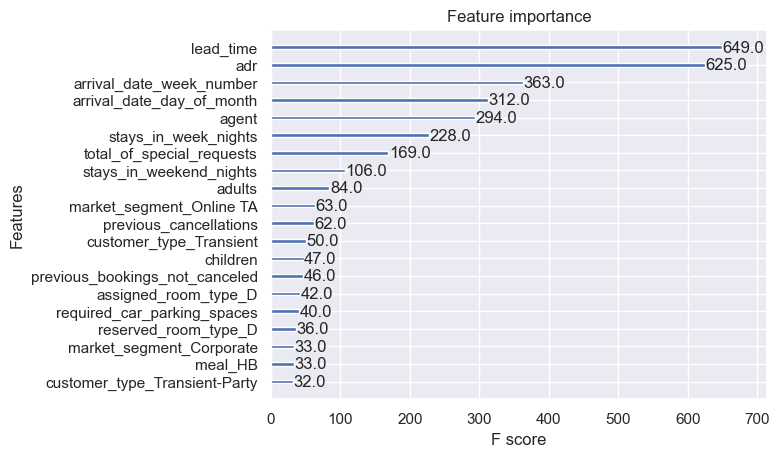

In [46]:
# show feature importance according to our model
plot_importance(base_model, max_num_features=20)
plt.show()

<b>Permutation Importance</b>: This permutation method will randomly shuffle each feature and compute the change in the model’s performance. If accuracy suffers by a large difference, then that feature is important.

We observe the following:
- It considers the feature `total_of_special_requests` which is also one of the previous top features, but is now considered to be the most important this time; followed by `lead_time`.
- We see the same features such `market_segment_Online TA`, `agent`, `adr`, and others to still be at the top 20 only with slight change in importance.

In [47]:
%%time
# compute permutation importance for each feature
perm_importance = permutation_importance(base_model, X_train, y_train)

CPU times: total: 3min 5s
Wall time: 32.3 s


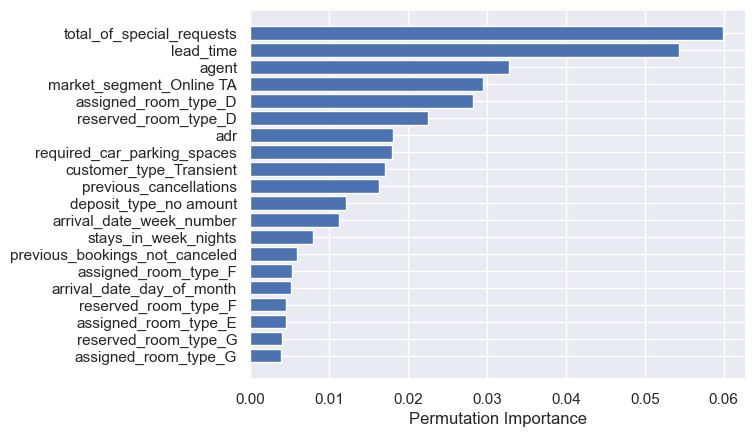

In [48]:
sorted_idx = perm_importance.importances_mean.argsort()
# sort feature names
features = X_train.columns
sorted_features = np.array(features)[sorted_idx]
# sort feature importance
sorted_importance = perm_importance.importances_mean[sorted_idx]

# plot permutation importance
plt.barh(sorted_features[-20:], sorted_importance[-20:])
plt.xlabel("Permutation Importance")
plt.show()

<b>SHAP values</b>: SHAP is a model-agnostic technique that provides individual feature contributions to each prediction. It takes into account the interactions between features and provides more nuanced insights into how each feature affects predictions.

In [49]:
%%time
explainer = shap.TreeExplainer(base_model)
shap_values = explainer(X_train)

CPU times: total: 46.8 s
Wall time: 8.01 s


The shap summary plot works similarly to a feature importance. It computes the average of the absolute SHAP values for all features and all samples in the selected set. These are then sorted and presented as a bar plot.

We observe the following:
- These are the same features we saw in the previous feature importance plots only with `required_car_parking_spaces` bumped to the top.

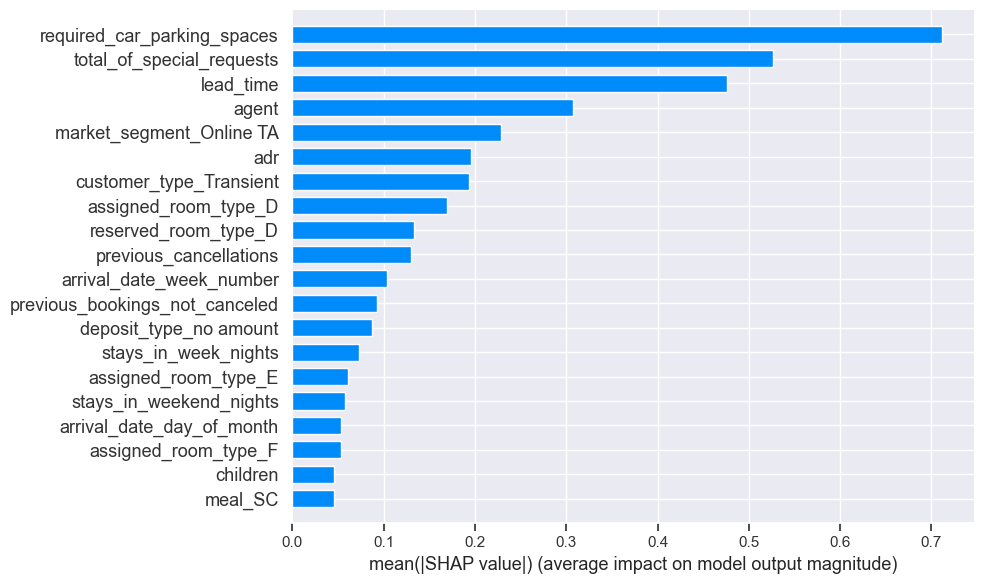

In [50]:
shap.summary_plot(shap_values, X_train, plot_type='bar', plot_size=(10, 6))

The next plot, beeswarm plot, the same plot as the summary plot previously. Tne main difference is that we now see more information about it.

Interpretation:
- SHAP values represent how much the feature contributed to the model's output (as to whether a booking would be canceled).
  - A positive value means it pushed the prediction higher than the base value (more likely to cancel booking)
  - A negative value means it pushed the prediction lower than the base value (less likely to cancel booking).
  - A value close to 0 or the base value means it did not have contribution to the prediction.
  - Note: A base value represents the average prediction of the model across the dataset and serves as a reference point for explaining individual predictions.
- Colors represent the feature value
  - Red dots indicate a high value of the feature (ex. a very high lead_time would be represented by a shiny red color).
  - Blue dots indicate a lower value of the feature (ex. a very low lead_time would be represented by a shiny blue color).

We observe the following:
- `required_car_parking_spaces`: When required car parking spaces is few (most likely 0), there is not much to say. However, when it is <b>many</b> they are <u>less likely chance to cancel their booking</u>. More cars means more people. Perhaps people are more likely to commit to a planned trip when more people are attending.
- `total_of_special_requests`: When there are <b>few</b> special requests (eg. twin bed or high floor), they are <u>slightly more likely to cancel a booking</u>. However, when there are <b>many</b> they are <u>less likely to cancel their booking</u>. Perhaps people are much happy with their booking when many of their requests are accommodated.
- `lead_time`: When a booking is <b>reserved for a short date</b> into the future, they are <u>less likely to cancel their booking</u>. However, when it is <b>reserved for a long date</b> into the future, they are <u>more likely to cancel a booking</u>. It can be difficult to know what your schedule would be like far into the future. Perhaps people suddenly become busy on their appointed booked date or they forget they even had a booking.
- `previous_cancelations`: When they have little to no previous cancellations, there is not much to say. However, when they have <b>many</b> we see that they are also <u>more likely to cancel their current booking</u>. Perhaps when a person habitually cancels his bookings, we can expect that he is someone who might also easily cancel his current and future bookings.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


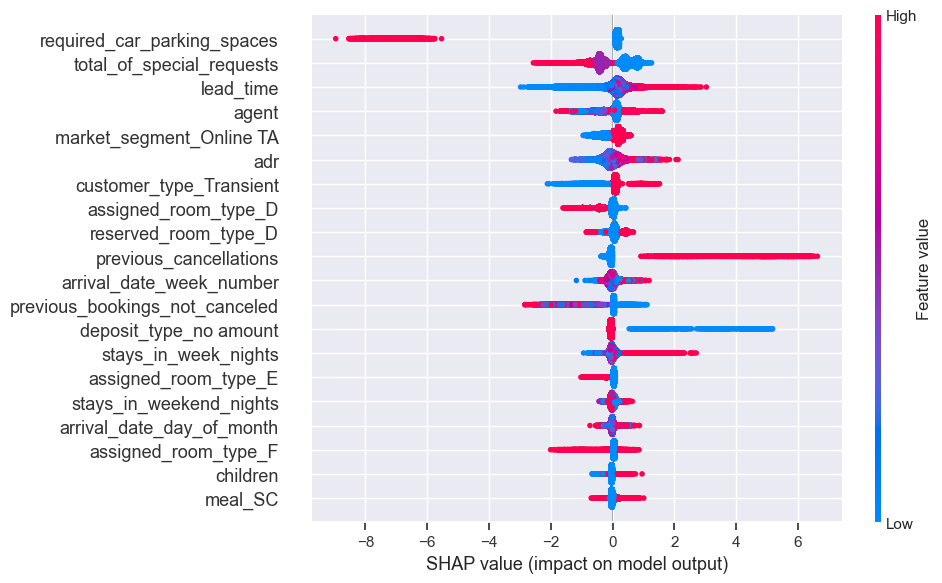

In [69]:
shap.summary_plot(shap_values, X_train, plot_type='dot', plot_size=(10, 6))

The next plots are scatter plots which show a more in depth view of how a feature's amount value (previously represented by a color blue-to-red)  would affect its feature importance (SHAP value). These are interaction dependence plot to help capture the main effects of the feature given a value.

We observe the following:
- `required_car_parking_spaces`: even a <b>single value is enough</b> for the SHAP value to be largely affected negatively (less likely to cancel booking).
- `total_of_special_requests`: as the value increases, the SHAP value is affected negatively (less likely to cancel booking).
- `lead_time`: the best indicator of large SHAP value (when a person is less likely or more likely to cancel their booking) is when the lead time is very low or very high.

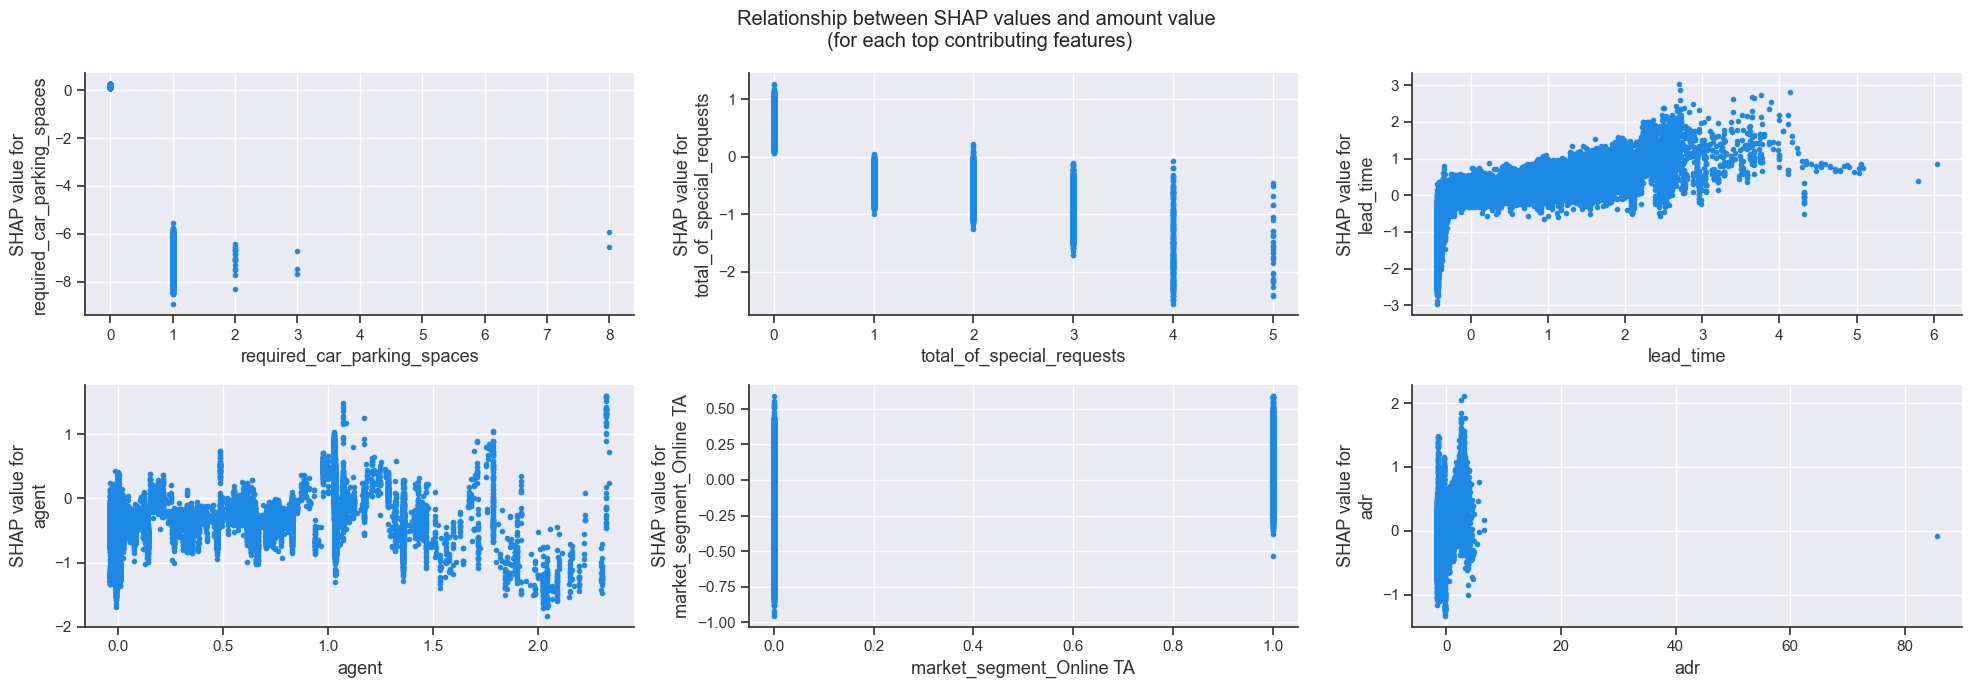

CPU times: total: 953 ms
Wall time: 942 ms


In [82]:
%%time
# get top 6 features which had the highest contribution
features_with_high_contributions = X_train.columns[np.abs(shap_values.values).mean(0).argsort()[::-1][:6]]

# create plots of these features' values and shap values
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 7))
axes_list = axes.ravel()

for i in range(len(axes_list)):
    shap.dependence_plot(features_with_high_contributions[i], shap_values.values, X_train, interaction_index=None, show=False, ax=axes_list[i])

plt.suptitle('Relationship between SHAP values and amount value \n(for each top contributing features)', fontsize='large')
plt.tight_layout()
plt.show()

The next plots are dependence plots which show the interaction between the features and another feature they are most correlated with.

We observe the following:
- It is impressive to see that majority of them chose `market_segment_Online TA` (booking was made by a Travel Agents or TA  on behalf of the customer).
- However, there is not much additional information we can see. Perhaps other feature interactions can be explored.

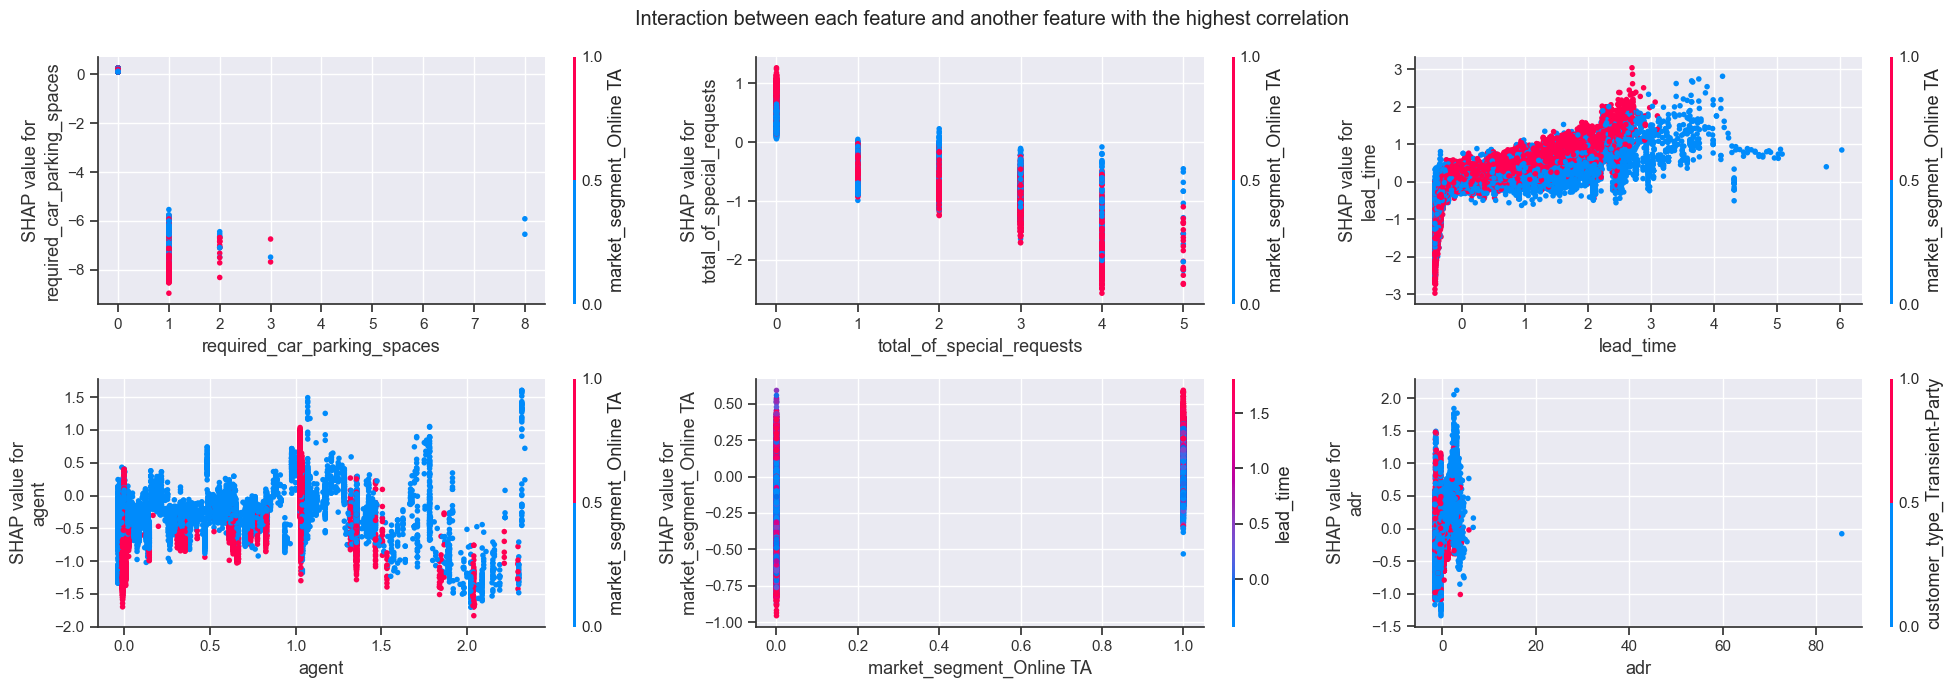

CPU times: total: 8.72 s
Wall time: 8.8 s


In [83]:
%%time
# create plots of these features' values and shap values
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 7))
axes_list = axes.ravel()

for i in range(len(axes_list)):
    shap.dependence_plot(features_with_high_contributions[i], shap_values.values, X_train, show=False, ax=axes_list[i])

plt.suptitle('Interaction between each feature and another feature with the highest correlation', fontsize='large')
plt.tight_layout()
plt.show()

#### 5.3.3 Feature Selection
We now remove the features that did not bring much contribution to the model's prediction and see if that will improve our model's performance. In performing this task, we will use the feature importance calculated by the built-in xgboost feature importance.

We observe the following:
- We are able to retain an optimal accuracy by using only 48 out of 67 features.

In [84]:
def evaluate_model(model: BaseEstimator, X_train:pd.DataFrame, y_train:pd.DataFrame, scoring='accuracy'):
    """
        score a model using 5 fold cross validation
    Args:
        model: estimator
        X_train: training split features
        y_train: training split label
        scoring: metric to score the model


    Returns: cross validation scores

    """
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=69)
    scores = cross_val_score(model, X_train, y_train, cv=skfold, scoring=scoring)

    return scores

In [85]:
%%time
# # perform feature selection
# thresholds = np.sort(base_model.feature_importances_)
# n_features = []
# accuracies = []
#
# for thresh in thresholds:
#     # select features using threshold
#     selection = SelectFromModel(base_model, threshold=thresh, prefit=True)
#     select_X_train = selection.transform(X_train.values)
#     # train and evaluate model
#     selection_model = XGBClassifier()
#     scores = evaluate_model(selection_model, select_X_train, y_train)
#     n = select_X_train.shape[1]
#     accuracy = np.mean(scores)
#     # record results
#     n_features.append(n)
#     accuracies.append(accuracy)
#     print(f"Thresh={thresh}, n={n}, Accuracy:{accuracy:.4f}")
#
# # save to csv
# feature_selection_cv_results = pd.DataFrame({
#     'thresholds':thresholds,
#     'n_features':n_features,
#     'accuracies': accuracies
# })
# feature_selection_cv_results.to_csv('results/feature_selection_cv_results.csv', index=False)

# load previous results from feature selection
feature_selection_cv_results = pd.read_csv('results/feature_selection_cv_results.csv')
feature_selection_cv_results

CPU times: total: 0 ns
Wall time: 8 ms


,thresholds,n_features,accuracies
0,0.000000,67,0.820099
1,0.000000,67,0.820099
2,0.000000,67,0.820099
3,0.000000,67,0.820099
4,0.000000,67,0.820099
...,...,...,...
62,0.046412,5,0.742868
63,0.079067,4,0.735542
64,0.098033,3,0.735385
65,0.140506,2,0.734984


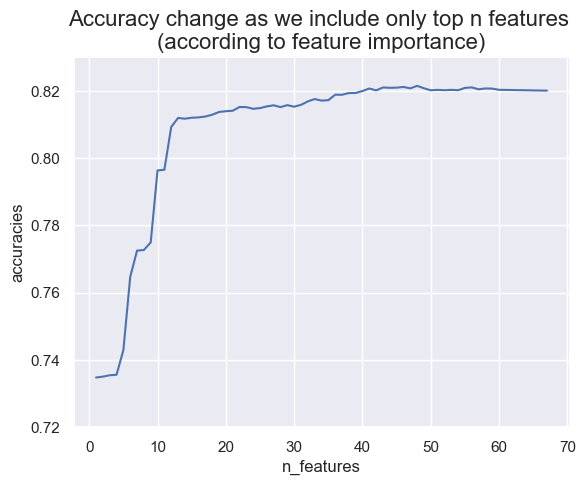

We only need 48 out of 67 features to get the maximum accuracy of 0.8215 (w/ threshold 0.0037851173).


In [86]:
# get row which had the max accuracy
max_accuracy_index = feature_selection_cv_results['accuracies'].idxmax()
max_accuracy_row = feature_selection_cv_results.loc[max_accuracy_index]

# get max values
max_accuracy_score = max_accuracy_row.loc['accuracies']         # .0038 threshold
max_accuracy_threshold = max_accuracy_row.loc['thresholds']     # .8215 accuracy
max_accuracy_n_features = max_accuracy_row.loc['n_features']    # 48 features

# plot accuracy change as we include only top n features \n(according to feature importance)
sns.lineplot(data=feature_selection_cv_results, x='n_features', y='accuracies')
plt.title('Accuracy change as we include only top n features \n(according to feature importance)', fontsize=16)
plt.ylim(.72, .83)
plt.show()

print(f"We only need {int(max_accuracy_n_features)} out of {feature_selection_cv_results['n_features'].max()} features to get the maximum accuracy of {max_accuracy_score:.4f} (w/ threshold {max_accuracy_threshold}).")

In [87]:
# select features using best threshold
selection = SelectFromModel(base_model, threshold=max_accuracy_threshold, prefit=True)
select_X_train = selection.transform(X_train.values)
# get removed features
selected_features_mask = selection.get_support()
removed_features = X_train.columns[~selected_features_mask]
print(f"The following are the {len(removed_features)} removed features (did not bring much contribution to the model's prediction):")
print(removed_features)

The following are the 19 removed features (did not bring much contribution to the model's prediction):
Index(['arrival_date_day_of_month', 'stays_in_weekend_nights', 'babies',
       'arrival_date_month_December', 'arrival_date_month_February',
       'arrival_date_month_March', 'arrival_date_month_May',
       'arrival_date_month_November', 'market_segment_Complementary',
       'market_segment_Undefined', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_Undefined',
       'reserved_room_type_H', 'reserved_room_type_L', 'reserved_room_type_P',
       'assigned_room_type_H', 'assigned_room_type_L', 'assigned_room_type_P'],
      dtype='object')


In [88]:
# # train model with only a subset of the features
# selection_model = XGBClassifier()
# selection_model.fit(select_X_train, y_train)
# save_file(selection_model, 'models/XGBClassifier_selection.pkl')

# load previously trained selection model
selection_model = load_file('models/XGBClassifier_selection.pkl')

# test model
select_X_test = selection.transform(X_test.values)
y_pred = selection_model.predict(select_X_test)
selection_accuracy = accuracy_score(y_test, y_pred)

In [89]:
# compare base accuracy and accuracy after using only a subset of the features
print(f'base accuracy:\t\t\t\t{base_accuracy:.4f}')
print(f'after feature selection:\t{selection_accuracy:.4f}')

base accuracy:				0.8229
after feature selection:	0.8228


#### 5.3.4 Model Tuning
Tuning improved the accuracy by a tiny bit.

In [94]:
def tune_xgbclassifier(X_train: pd.DataFrame, y_train: pd.DataFrame) -> Tuple[XGBClassifier, dict]:
    """
    tune the hyperparameters of XGBClassifier model.

    Args:
        y_train: training split features selected with feature selection
        X_train: training split target

    Returns: tuned model and its tuned hyperparameters

    """
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
    }

    # create model
    model = XGBClassifier()
    # perform hyperparameter search
    skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=69)
    grid_search = GridSearchCV(model, param_grid, cv=skfold, scoring='accuracy', verbose=3, n_jobs=-1)
    # train model
    grid_search.fit(X_train,y_train)
    # get best model
    best_model = grid_search.best_estimator_
    # get best params
    best_params = grid_search.best_params_

    return best_model, best_params

In [95]:
%%time
# tuned_model, tuned_params = tune_xgbclassifier(select_X_train, y_train) #took 33mins
# save_file(tuned_model, 'models/XGBClassifier_selection_tuned.pkl')
# save_file(tuned_params, 'models/XGBClassifier_selection_tuned_params.pkl')

# load previously tuned model
tuned_model = load_file('models/XGBClassifier_selection_tuned.pkl')
# test model
y_pred = tuned_model.predict(select_X_test)
tuned_accuracy = accuracy_score(y_test, y_pred)

CPU times: total: 203 ms
Wall time: 35 ms


In [101]:
# compare base accuracy, after feature selection, and after tuning model
print(f'base accuracy:\t\t\t\t\t\t{base_accuracy:.4f}')
print(f'after feature selection:\t\t\t{selection_accuracy:.4f}')
print(f'after feature selection and tuning:\t{tuned_accuracy:.4f}')

base accuracy:						0.8229
after feature selection:			0.8228
after feature selection and tuning:	0.8233


## 6. Conclusion

In this project, we explored factors influencing booking cancellations and developed a predictive model to determine if a booking is likely to be canceled. Our analysis provided valuable insights:
- The majority of bookings (61.15%) were from city hotels, with a higher cancellations rate to resort hotels (30% vs 23%).
- Bookings with long lead times (80 days or more) were more likely to be canceled, while shorter lead times (38 days or less) correlated with lower cancellation rates.
- Summer months (July and August) saw the highest number of bookings, while winter months (December and January) had the lowest.
- Certain room types, both in city and resort hotels, had higher average daily rates (ADR).
- Guests with multiple previous cancellations were more likely to cancel their current booking.

Our XGBoost Classifier performed well in predicting cancellations, with `required_car_parking_spaces`, `total_of_special_requests`, `lead_time`, `agent`, `market_segment_Online TA`, `adr` being key predictors. Using Explainable AI (XAI) techniques, we gained transparency into the model's decisions.

By leveraging these insights, hotels can better plan resources, enhance customer satisfaction, and optimize operations. The combination of EDA, ML, and XAI empowers the hospitality industry to make data-driven decisions, ultimately improving overall efficiency and guest experience.

## References

[Feature Importance and Feature Selection With XGBoost in Python](https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/)- provided guidance in using feature selection with built-in XGBoost feature importance
[Machine Learning Explainability](https://www.kaggle.com/learn/machine-learning-explainability)- a short course explaining multiple techniques for ML Explainability.
[Xgboost Feature Importance Computed in 3 Ways with Python](https://mljar.com/blog/feature-importance-xgboost/)- provided guidance to computing feature importance.
[Quickly Compare Multiple Models](https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0)- provided guidance to train and evaluate multiple models efficiently